<a href="https://colab.research.google.com/github/omkar1312-dev/NSE-Stock-Prediction-/blob/main/Nse_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install virtualenv
!virtualenv My_env

created virtual environment CPython3.10.12.final.0-64 in 276ms
  creator CPython3Posix(dest=/content/My_env, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==23.3.1, setuptools==69.0.2, wheel==0.42.0
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


In [2]:
!pip install -r requirements.txt

# Step 1 : Import All the Required Libraries

In [3]:
#Loading libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import sklearn.linear_model
import sklearn
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import warnings

warnings.filterwarnings('ignore')

# Step2 : Read Dataset And Basic Details Of Dataset

Goal:- In this step we are going to read the dataset, view the dataset and analysis the basic details like total number of rows and columns, what are the column data types and see to need to create new column or not.

In this stage we are going to read our problem dataset and have a look on it.

In [16]:
tata_motors_df = pd.read_csv('/content/Tata Motors.csv')
tata_motors_df.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,28-Dec-2023,EQ,742.65,757.95,739.05,740.90,754.85,753.90,748.29,757.95,375.2,"1,49,06,199","11,15,42,32,289.65","2,43,381"
1,27-Dec-2023,EQ,728.00,741.85,725.15,719.55,740.30,740.90,735.95,741.85,375.2,"1,50,52,800","11,07,81,42,060.15","2,88,698"
2,26-Dec-2023,EQ,727.40,727.50,716.60,724.70,720.00,719.55,721.73,734.75,375.2,"72,29,143","5,21,75,10,087.80","1,95,383"
3,22-Dec-2023,EQ,716.80,731.00,712.00,708.85,725.00,724.70,724.50,734.75,375.2,"1,20,62,238","8,73,91,00,445.30","2,88,650"
4,21-Dec-2023,EQ,703.00,711.90,696.25,705.25,710.00,708.85,707.01,734.75,375.2,"77,02,232","5,44,55,51,052.70","2,08,027"


In [19]:
print(tata_motors_df.columns)

Index(['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ',
       'No of trades '],
      dtype='object')


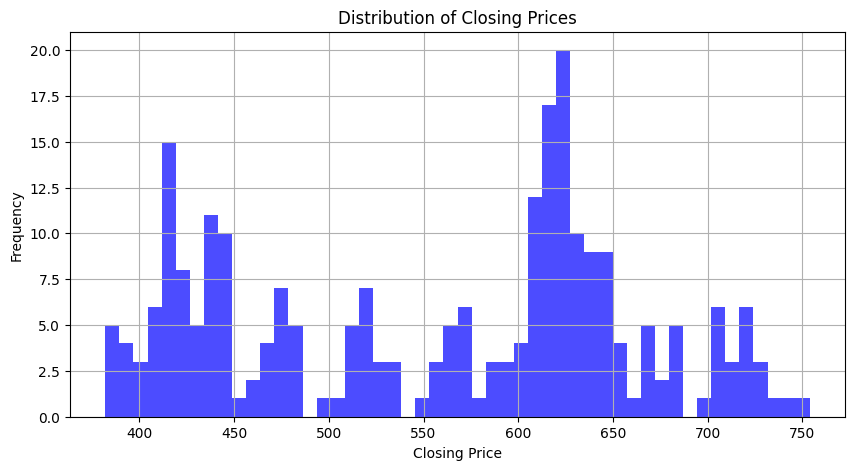

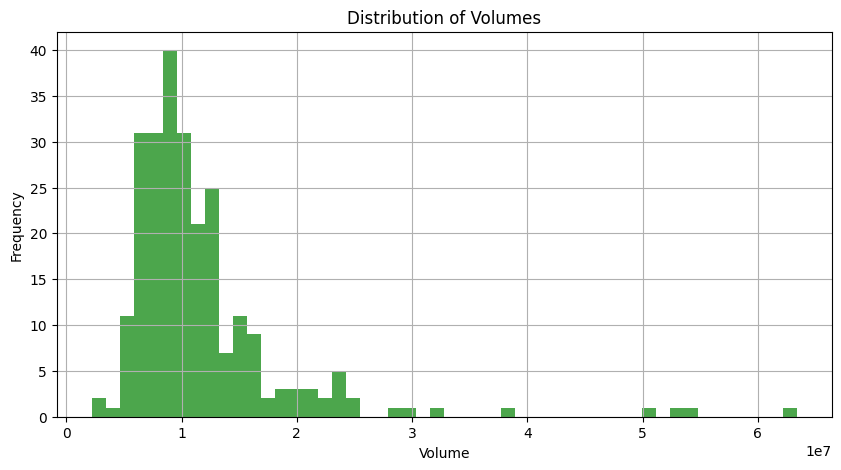

In [20]:
tata_motors_df.columns = [col.strip() for col in tata_motors_df.columns]

# Plotting the distribution of closing prices
plt.figure(figsize=(10, 5))
plt.hist(tata_motors_df['close'], bins=50, alpha=0.7, color='blue')
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting the distribution of volumes
plt.figure(figsize=(10, 5))
plt.hist(tata_motors_df['VOLUME'].str.replace(',', '').astype(float), bins=50, alpha=0.7, color='green')
plt.title('Distribution of Volumes')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# EDA

In [21]:
print(tata_motors_df.describe())


             OPEN        HIGH         LOW  PREV. CLOSE         ltp  \
count  248.000000  248.000000  248.000000   248.000000  248.000000   
mean   556.530242  561.810282  550.352419   554.465323  555.960484   
std    102.959811  103.564800  101.927306   102.452428  102.791926   
min    386.100000  388.400000  381.000000   382.000000  382.050000   
25%    445.150000  448.962500  438.712500   444.025000  444.212500   
50%    586.650000  591.500000  580.225000   584.950000  587.950000   
75%    633.237500  637.900000  626.262500   628.800000  630.150000   
max    742.650000  757.950000  739.050000   740.900000  754.850000   

            close        vwap       52W H       52W L  
count  248.000000  248.000000  248.000000  248.000000  
mean   555.915927  556.088387  597.517137  371.897581  
std    102.719832  102.655782   82.372685    4.346490  
min    382.000000  384.040000  494.400000  366.200000  
25%    444.637500  443.715000  513.837500  366.200000  
50%    587.450000  586.795000  59

In [22]:

print(tata_motors_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          248 non-null    object 
 1   series        248 non-null    object 
 2   OPEN          248 non-null    float64
 3   HIGH          248 non-null    float64
 4   LOW           248 non-null    float64
 5   PREV. CLOSE   248 non-null    float64
 6   ltp           248 non-null    float64
 7   close         248 non-null    float64
 8   vwap          248 non-null    float64
 9   52W H         248 non-null    float64
 10  52W L         248 non-null    float64
 11  VOLUME        248 non-null    object 
 12  VALUE         248 non-null    object 
 13  No of trades  248 non-null    object 
dtypes: float64(9), object(5)
memory usage: 27.2+ KB
None


1-The dataset contains 248 entries with no missing values across all numerical columns.                    

2-The OPEN, HIGH, LOW, PREV. CLOSE, ltp, close, and vwap columns are of type float64, indicating they are numerical and ready for analysis.

3-The VOLUME column is of type object, which suggests it contains non-numeric data, likely due to formatting with commas. This will need to be converted to a numeric type for analysis.

4-The Date column is of type object, indicating it is likely in a string format and may need to be converted to a datetime type for time series analysis.
The series column is also of type object and likely contains categorical data.

In [23]:
# Next,will convert the VOLUME column to a numeric type and the Date column to a datetime type for further analysis.


import pandas as pd
from tqdm.notebook import tqdm

tqdm.pandas()

# Convert 'VOLUME' to numeric, removing commas
# Convert 'Date' to datetime
# Convert 'VALUE' to numeric, removing commas
# Convert 'No of trades' to numeric, removing commas

tata_motors_df['VOLUME'] = tata_motors_df['VOLUME'].str.replace(',', '').astype(float)
tata_motors_df['VALUE'] = tata_motors_df['VALUE'].str.replace(',', '').astype(float)
tata_motors_df['No of trades'] = tata_motors_df['No of trades'].str.replace(',', '').astype(float)
tata_motors_df['Date'] = pd.to_datetime(tata_motors_df['Date'], format='%d-%b-%Y')

# Display the data types to confirm the changes
print(tata_motors_df.dtypes)

Date            datetime64[ns]
series                  object
OPEN                   float64
HIGH                   float64
LOW                    float64
PREV. CLOSE            float64
ltp                    float64
close                  float64
vwap                   float64
52W H                  float64
52W L                  float64
VOLUME                 float64
VALUE                  float64
No of trades           float64
dtype: object


In [24]:
print(tata_motors_df.head())

        Date series    OPEN    HIGH     LOW  PREV. CLOSE     ltp   close  \
0 2023-12-28     EQ  742.65  757.95  739.05       740.90  754.85  753.90   
1 2023-12-27     EQ  728.00  741.85  725.15       719.55  740.30  740.90   
2 2023-12-26     EQ  727.40  727.50  716.60       724.70  720.00  719.55   
3 2023-12-22     EQ  716.80  731.00  712.00       708.85  725.00  724.70   
4 2023-12-21     EQ  703.00  711.90  696.25       705.25  710.00  708.85   

     vwap   52W H  52W L      VOLUME         VALUE  No of trades  
0  748.29  757.95  375.2  14906199.0  1.115423e+10      243381.0  
1  735.95  741.85  375.2  15052800.0  1.107814e+10      288698.0  
2  721.73  734.75  375.2   7229143.0  5.217510e+09      195383.0  
3  724.50  734.75  375.2  12062238.0  8.739100e+09      288650.0  
4  707.01  734.75  375.2   7702232.0  5.445551e+09      208027.0  


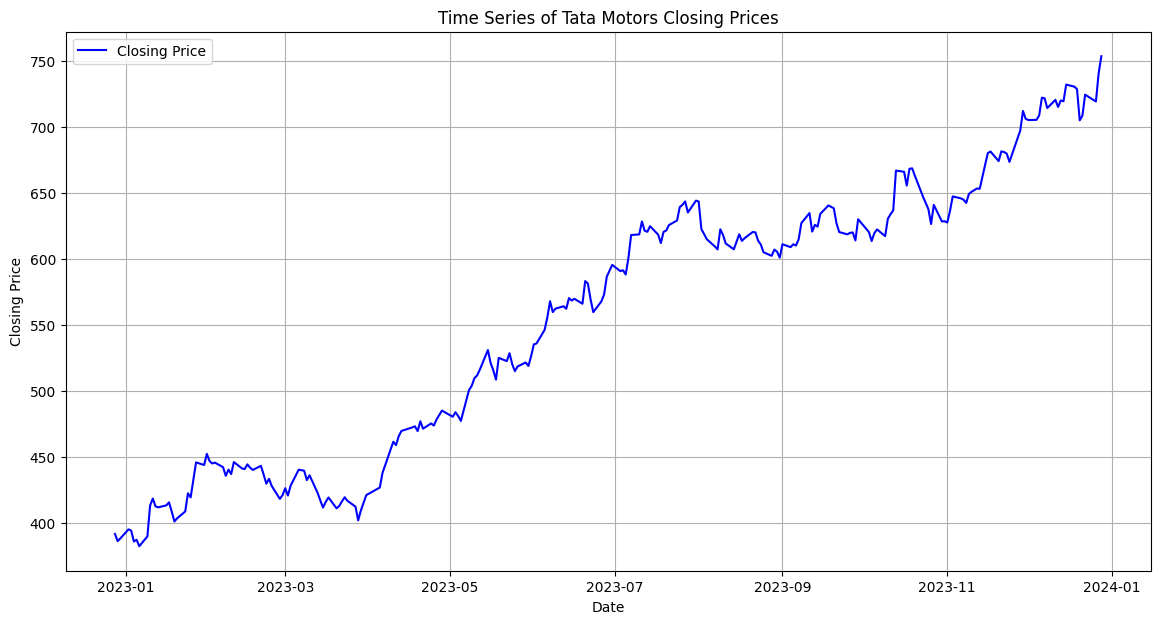

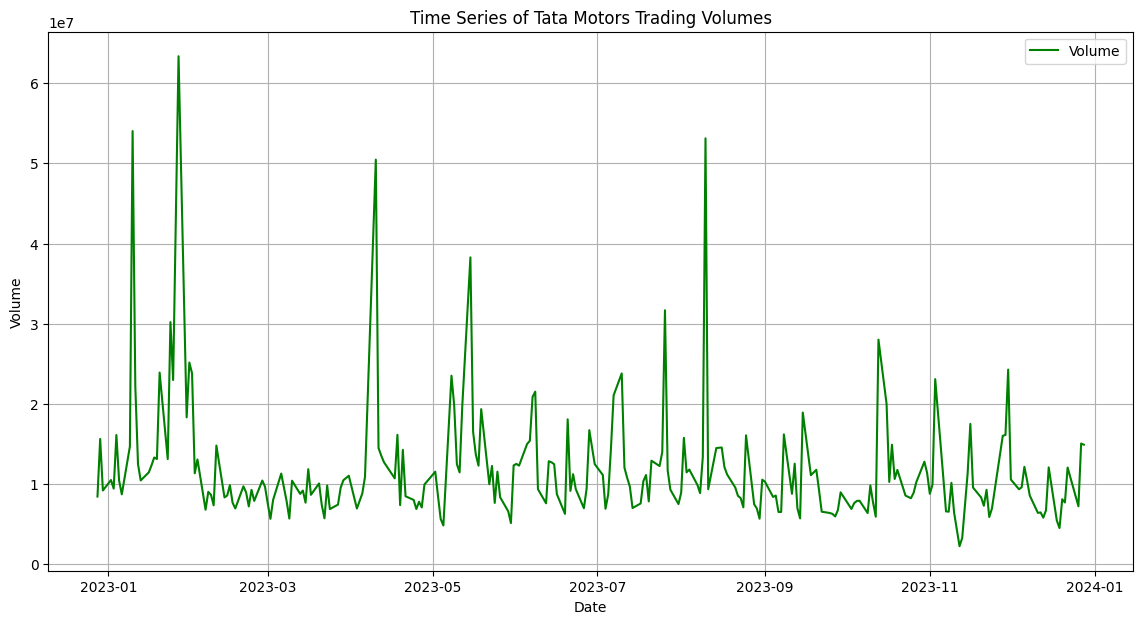

In [25]:
import matplotlib.pyplot as plt

# Plotting the time series of closing prices
plt.figure(figsize=(14, 7))
plt.plot(tata_motors_df['Date'], tata_motors_df['close'], label='Closing Price', color='blue')
plt.title('Time Series of Tata Motors Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the time series of volumes
plt.figure(figsize=(14, 7))
plt.plot(tata_motors_df['Date'], tata_motors_df['VOLUME'], label='Volume', color='green')
plt.title('Time Series of Tata Motors Trading Volumes')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

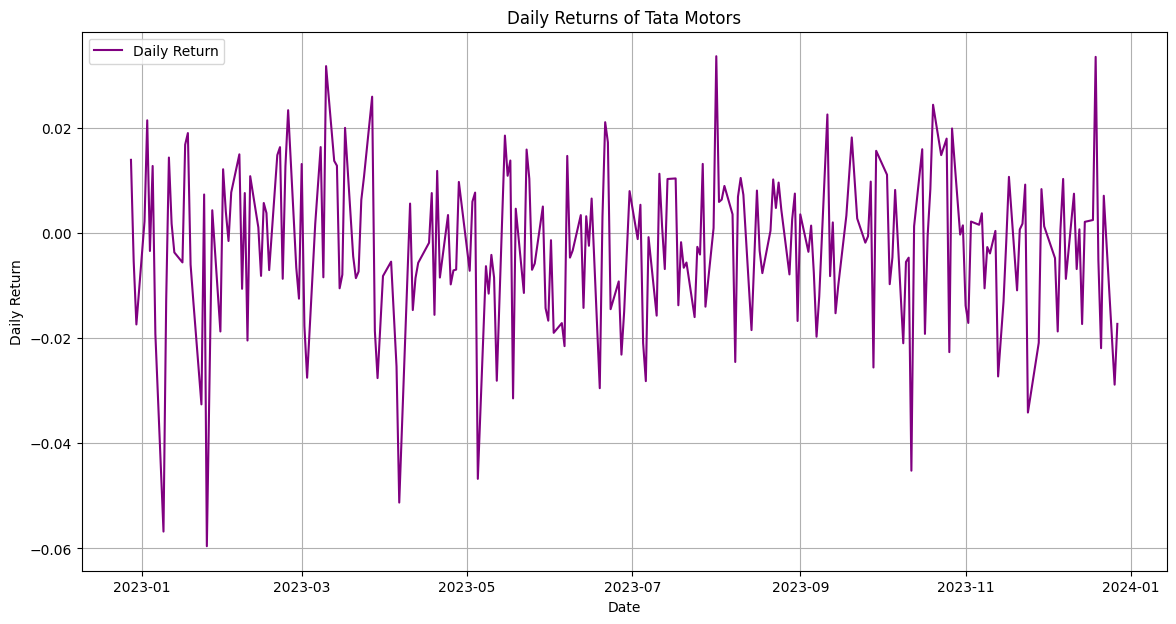

count    247.000000
mean      -0.002539
std        0.014938
min       -0.059583
25%       -0.010710
50%       -0.001459
75%        0.007713
max        0.033727
Name: daily_return, dtype: float64


In [28]:
# Calculating the daily returns
# Daily return is calculated as (Today's Close - Yesterday's Close) / Yesterday's Close

tata_motors_df['daily_return'] = tata_motors_df['close'].pct_change()

# Plotting the daily returns
plt.figure(figsize=(14, 7))
plt.plot(tata_motors_df['Date'], tata_motors_df['daily_return'], label='Daily Return', color='purple')
plt.title('Daily Returns of Tata Motors')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.show()

# Summary statistics for daily returns
print(tata_motors_df['daily_return'].describe())

The daily returns of Tata Motors have been calculated and plotted. The summary statistics for daily returns show:

The average daily return is slightly negative at approximately -0.0025.

The standard deviation of daily returns is about 0.0149, indicating the volatility in daily returns.

The minimum and maximum daily returns observed are approximately -0.0596 and 0.0337, respectively.

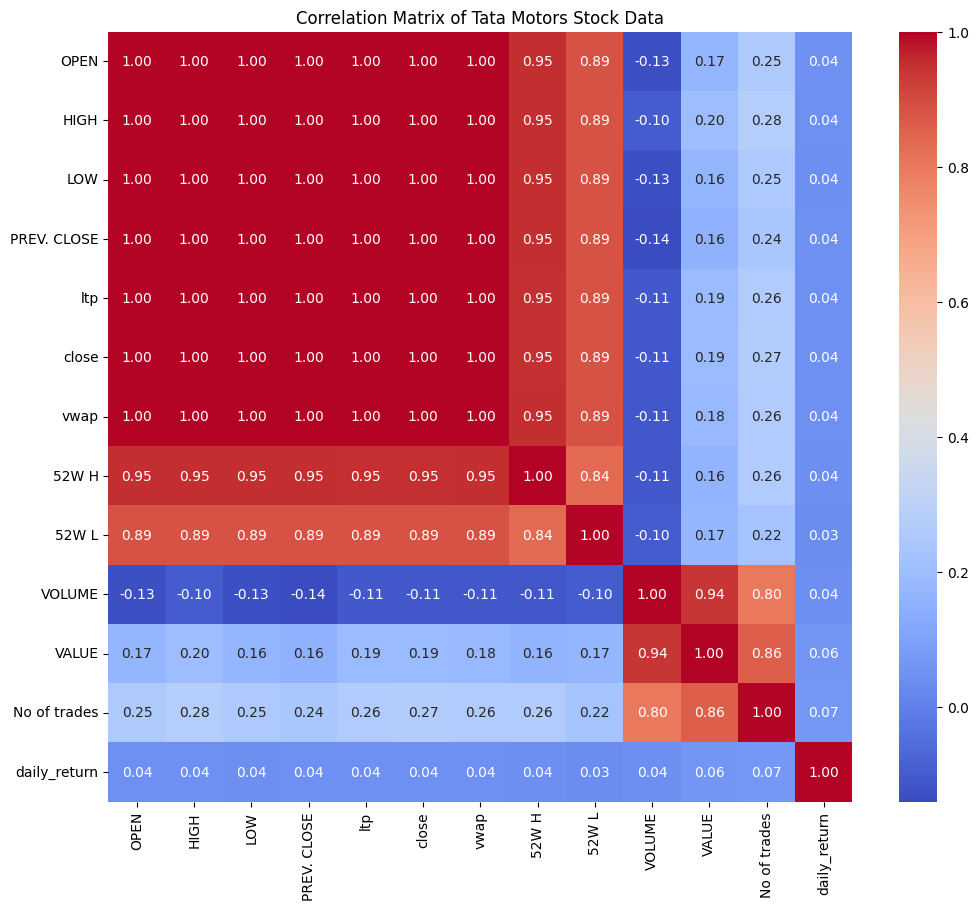

In [29]:
import seaborn as sns

# Correlation matrix of the numerical features
numerical_features = ['OPEN', 'HIGH', 'LOW', 'PREV. CLOSE', 'ltp', 'close', 'vwap', '52W H', '52W L', 'VOLUME', 'VALUE', 'No of trades', 'daily_return']
correlation_matrix = tata_motors_df[numerical_features].corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Tata Motors Stock Data')
plt.show()

The heatmap above displays the correlation matrix for the numerical features of the Tata Motors stock data. It shows how different stock attributes are related to each other, with 1 indicating a perfect positive correlation and -1 indicating a perfect negative correlation.

# **## Next, will perform a more advanced analysis by creating a simple moving average (SMA) and an exponential moving average (EMA) for the closing prices to identify trends.**

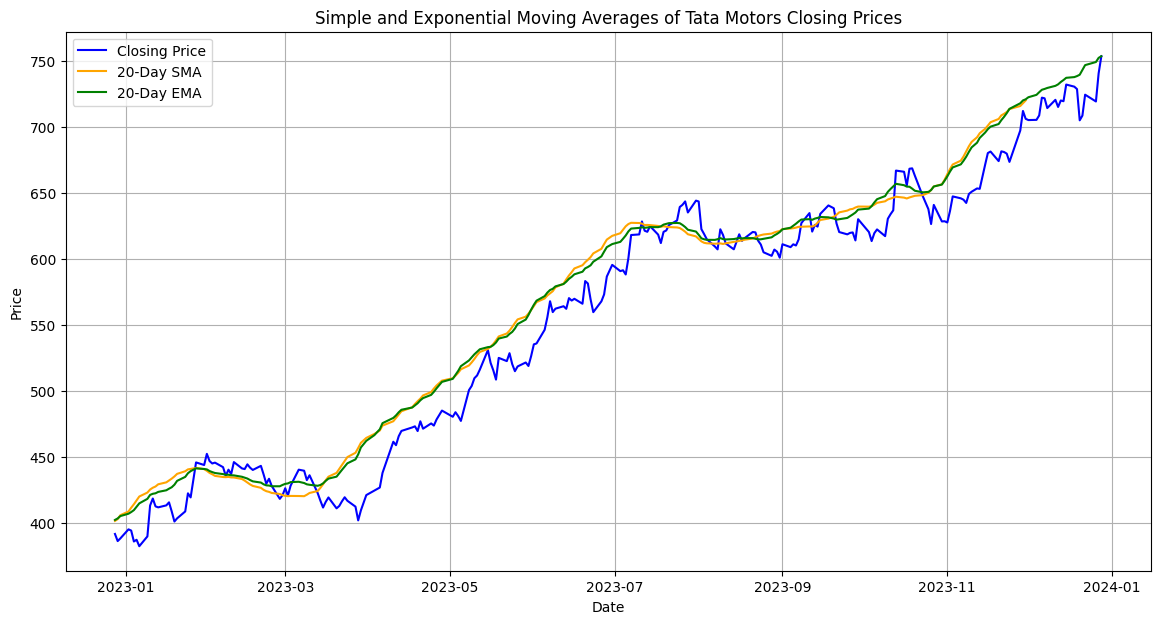

In [30]:
# Calculating the Simple Moving Average (SMA) and Exponential Moving Average (EMA)
tata_motors_df['SMA_20'] = tata_motors_df['close'].rolling(window=20).mean()
tata_motors_df['EMA_20'] = tata_motors_df['close'].ewm(span=20, adjust=False).mean()

# Plotting the SMA and EMA along with the closing prices
plt.figure(figsize=(14, 7))
plt.plot(tata_motors_df['Date'], tata_motors_df['close'], label='Closing Price', color='blue')
plt.plot(tata_motors_df['Date'], tata_motors_df['SMA_20'], label='20-Day SMA', color='orange')
plt.plot(tata_motors_df['Date'], tata_motors_df['EMA_20'], label='20-Day EMA', color='green')
plt.title('Simple and Exponential Moving Averages of Tata Motors Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

The chart above shows the closing prices of Tata Motors along with the 20-day Simple Moving Average (SMA) and the 20-day Exponential Moving Average (EMA). These moving averages help to smooth out price data to identify the trend direction and can be used as a tool to signal potential buying or selling opportunities.

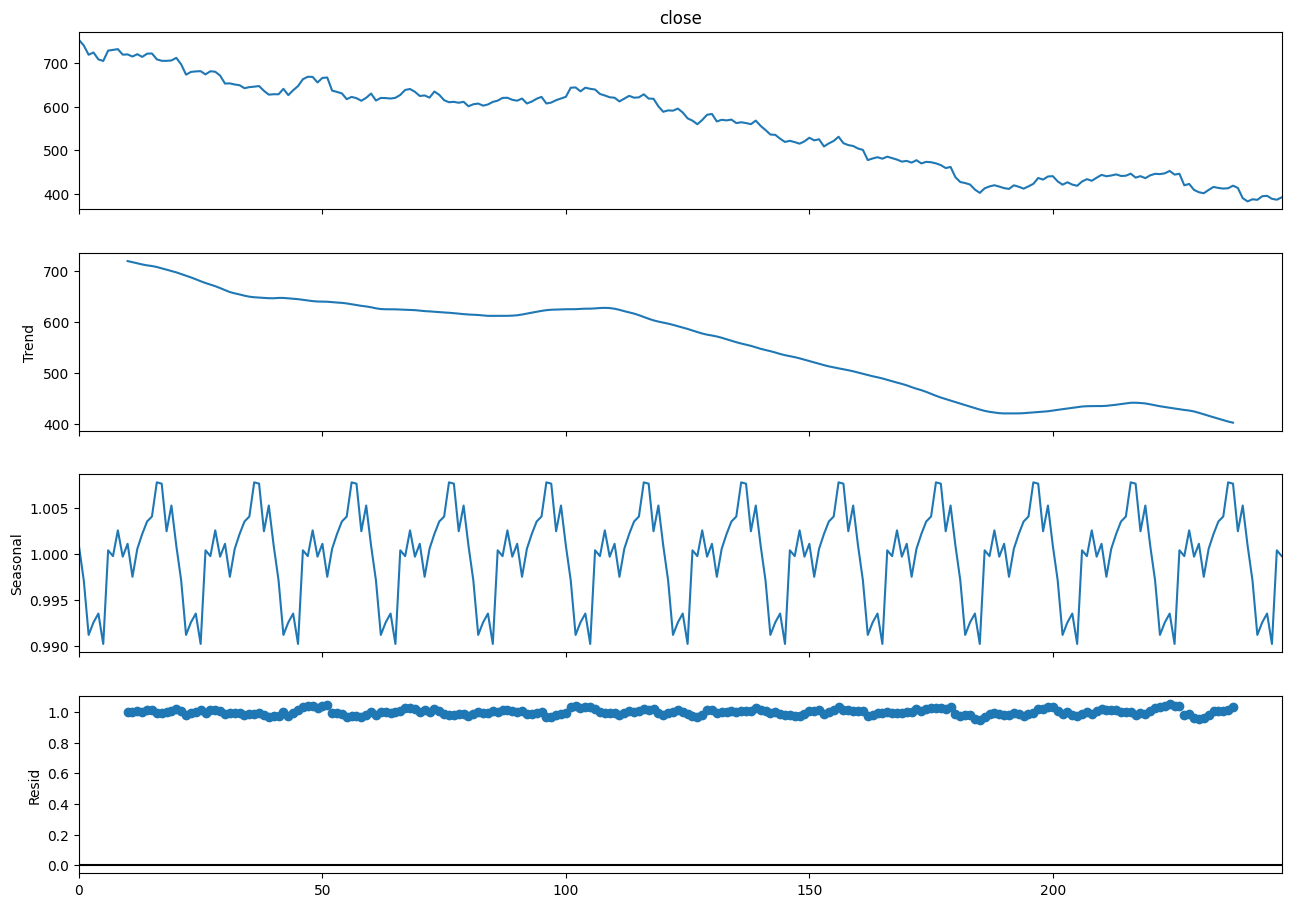

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposing the closing price to observe trends, seasonality, and residuals
result = seasonal_decompose(tata_motors_df['close'], model='multiplicative', period=20)

# Plotting the decomposed components of the time series
fig = result.plot()
fig.set_size_inches(14, 10)
plt.show()

## The decomposition of the closing price time series into trend, seasonality, and residuals provides a clearer picture of the underlying patterns in the data. This can be particularly useful for understanding and forecasting time series data.

In [32]:
from statsmodels.tsa.stattools import adfuller

# Performing the Augmented Dickey-Fuller test to check the stationarity of the closing price
df_test = adfuller(tata_motors_df['close'].dropna(), autolag='AIC')

# Creating a DataFrame to display test results
adf_results = pd.DataFrame({'ADF Test Statistic': df_test[0], 'p-value': df_test[1], 'Lags Used': df_test[2], 'Number of Observations Used': df_test[3]}, index=[0])

# Adding the critical value thresholds
for key, value in df_test[4].items():
    adf_results['Critical Value (%s)' % key] = value

# Display the results
print(adf_results)

   ADF Test Statistic   p-value  Lags Used  Number of Observations Used  \
0           -1.089386  0.719286          0                          247   

   Critical Value (1%)  Critical Value (5%)  Critical Value (10%)  
0            -3.457105            -2.873314             -2.573044  


The Augmented Dickey-Fuller test results are as follows:

ADF Test Statistic: -1.0894

p-value: 0.7193

Number of Lags Used: 0

Number of Observations Used: 247

Critical Values: -3.4571 (1%), -2.8733 (5%), -2.5730 (10%)

The test statistic is higher than the critical values and the p-value is above 0.05, suggesting that the closing price series is not stationary and may contain a unit root, indicating it may have a trend or seasonality.

In [37]:

from statsmodels.tsa.arima.model import ARIMA

# Converting the index to a datetime format if it's not already
tata_motors_df['Date'] = pd.to_datetime(tata_motors_df['Date'])
close_prices = tata_motors_df.set_index('Date')['close'].dropna()

# Now we can safely create a date range for the forecast
forecast_dates = pd.date_range(close_prices.index[-1] + pd.Timedelta(days=1), periods=5)

# Fitting an ARIMA model to the closing prices again
model = ARIMA(close_prices, order=(5,1,0))
model_fit = model.fit()

# Forecasting the next 5 days
forecast = model_fit.forecast(steps=5)

# Creating a DataFrame for the forecast
df_forecast = pd.DataFrame({'Forecast Date': forecast_dates, 'Forecasted Close': forecast})
print(df_forecast)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

    Forecast Date  Forecasted Close
248    2022-12-29        391.184104
249    2022-12-30        390.616520
250    2022-12-31        390.819778
251    2023-01-01        391.188948
252    2023-01-02        390.991238


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [38]:
# Since the ARIMA model has indicated non-stationarity, we will perform a differencing to make the series stationary
# and then fit an ARIMA model again.

# Differencing the series
tata_motors_df['close_diff'] = tata_motors_df['close'].diff().dropna()

# Checking stationarity again with the differenced data
stationarity_test_diff = adfuller(tata_motors_df['close_diff'].dropna(), autolag='AIC')

# Creating a DataFrame to display test results for the differenced data
adf_results_diff = pd.DataFrame({'ADF Test Statistic': stationarity_test_diff[0], 'p-value': stationarity_test_diff[1], 'Lags Used': stationarity_test_diff[2], 'Number of Observations Used': stationarity_test_diff[3]}, index=[0])
for key, value in stationarity_test_diff[4].items():
    adf_results_diff['Critical Value (%s)' % key] = value

# Display the results
print(adf_results_diff)

# Fitting an ARIMA model to the differenced data
model_diff = ARIMA(tata_motors_df['close_diff'].dropna(), order=(5,0,0))
model_fit_diff = model_diff.fit()

# Forecasting the next 5 days with the differenced data
forecast_diff = model_fit_diff.forecast(steps=5)
forecast_dates_diff = pd.date_range(tata_motors_df['Date'].iloc[-1] + pd.Timedelta(days=1), periods=5)

# Creating a DataFrame for the forecast with the differenced data
df_forecast_diff = pd.DataFrame({'Forecast Date': forecast_dates_diff, 'Forecasted Close Diff': forecast_diff})
print(df_forecast_diff)

   ADF Test Statistic       p-value  Lags Used  Number of Observations Used  \
0          -15.663716  1.542724e-28          0                          246   

   Critical Value (1%)  Critical Value (5%)  Critical Value (10%)  
0            -3.457215            -2.873362              -2.57307  


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


    Forecast Date  Forecasted Close Diff
247    2022-12-29              -1.936101
248    2022-12-30              -2.130436
249    2022-12-31              -1.206348
250    2023-01-01              -1.238434
251    2023-01-02              -1.932457


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [39]:
# Given the stationarity of the differenced series, we can now attempt to fit an ARIMA model to the original data
# with the differencing term included in the model itself.

# Fitting an ARIMA model to the original closing prices with differencing
model = ARIMA(tata_motors_df['close'], order=(5,1,0))
model_fit = model.fit()

# Forecasting the next 5 days using the fitted model
forecast = model_fit.forecast(steps=5)
forecast_dates = pd.date_range(tata_motors_df['Date'].iloc[-1], periods=5, freq='B')

# Creating a DataFrame for the forecast
forecast_df = pd.DataFrame({'Forecast Date': forecast_dates, 'Forecasted Close': forecast})
print(forecast_df)

    Forecast Date  Forecasted Close
248    2022-12-28        391.184104
249    2022-12-29        390.616520
250    2022-12-30        390.819778
251    2023-01-02        391.188948
252    2023-01-03        390.991238


In [40]:
# Since we have already forecasted the closing prices using ARIMA, we will now build a model.
# We will use the SARIMAX model which accounts for seasonality as well.

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the model
sarimax_model = SARIMAX(tata_motors_df['close'],
                        order=(1, 1, 1),
                        seasonal_order=(1, 1, 1, 5),
                        enforce_stationarity=False,
                        enforce_invertibility=False)

# Fit the model
sarimax_result = sarimax_model.fit()

# Summarize the model
model_summary = sarimax_result.summary()

# Print the summary
print(model_summary)

                                     SARIMAX Results                                     
Dep. Variable:                             close   No. Observations:                  248
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 5)   Log Likelihood                -830.133
Date:                           Wed, 03 Jan 2024   AIC                           1670.266
Time:                                   18:40:43   BIC                           1687.564
Sample:                                        0   HQIC                          1677.239
                                           - 248                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8572      0.198     -4.331      0.000      -1.245      -0.469
ma.L1          0.8636      0.194      4.454

In [41]:
# The SARIMAX model fitting process has been completed. Now, we will proceed to forecast the future values.
# We will forecast the next 5 business days.

# Forecasting the next 5 business days using the fitted SARIMAX model
sarimax_forecast = sarimax_result.get_forecast(steps=5)

# Get the forecast summary frame
forecast_summary = sarimax_forecast.summary_frame()

# Print the forecast summary
print(forecast_summary)

close        mean    mean_se  mean_ci_lower  mean_ci_upper
248    390.400202   8.069039     374.585177     406.215227
249    388.559806  11.447986     366.122165     410.997446
250    386.448723  14.010020     358.989588     413.907858
251    386.153879  16.189630     354.422788     417.884971
252    384.215638  18.093826     348.752391     419.678885
